# BackPropagation

Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs.

In this notebook, we create a neural network to implement backpropagation for the XOR problem.

In [1]:
# Import the required libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the input and expected output for a XOR gate problem

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

In [3]:
# Network parameters

inputSize = 2     # Number of input neurons (x1, x2)
hiddenSize = 2    # Number of hidden neurons
outputSize = 1    # Number of output neurons
lr = 0.1          # Learning rate
epochs = 180000   # Number of training epochs

In [4]:
# Initialize weights and biases randomly within the range [-1, 1]

w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1   # Weights from input to hidden layer
b1 = np.random.rand(hiddenSize, 1) * 2 - 1           # Bias for hidden layer
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Weights from hidden to output layer
b2 = np.random.rand(outputSize, 1) * 2 - 1           # Bias for output layer

In [5]:
# Training the network using backpropagation

error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.06618
Epoch: 19999, Average error: 0.03290
Epoch: 29999, Average error: 0.02447
Epoch: 39999, Average error: 0.02025
Epoch: 49999, Average error: 0.01763
Epoch: 59999, Average error: 0.01580
Epoch: 69999, Average error: 0.01443
Epoch: 79999, Average error: 0.01336
Epoch: 89999, Average error: 0.01250
Epoch: 99999, Average error: 0.01178
Epoch: 109999, Average error: 0.01117
Epoch: 119999, Average error: 0.01064
Epoch: 129999, Average error: 0.01018
Epoch: 139999, Average error: 0.00977
Epoch: 149999, Average error: 0.00941
Epoch: 159999, Average error: 0.00909
Epoch: 169999, Average error: 0.00880
Epoch: 179999, Average error: 0.00853


In [6]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

Final output after training: [[0.00784727 0.99185068 0.99186327 0.0099798 ]]
Ground truth [0 1 1 0]
Error after training: [[-0.00784729  0.00814934  0.00813675 -0.00997983]]
Average error: 0.00853


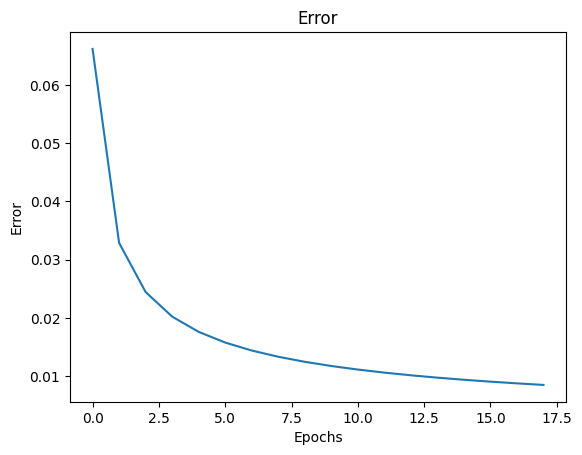

In [7]:
# Plot error

plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()